<a href="https://colab.research.google.com/github/jonesmo/learning_python/blob/master/Python_Self_Sufficiency_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#import everything
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import math
from numpy import mean
from numpy.random import randint
from scipy import stats
from numpy.random import seed

!pip install seaborn==0.9.0
import seaborn as sns
sns.set()
from google.colab import drive
drive.mount('/content/gdrive')

     |████████████████████████████████| 215kB 2.8MB/s 
  Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


1. Create a function that reverses a string. For example, given the string "forward", your function should return "drawrof". Assume all inputs are strings.

In [0]:
def reverse(string):
  backwards = ''
  characters = list(string)
  #print(characters)
  for n in range(1, len(string) + 1):
    current_char = string[n * -1]
    backwards += current_char
  return backwards

  #return string[::-1]

reverse('whatever')

'revetahw'

2: Complete the function below that can be used to calculate and return the posterior probability of an event A, given the known outcome of Event B using Bayes Theorem:



In [0]:
def bayes(a, b_given_a, b_given_not_a):
  return b_given_a * a / ((a*b_given_a) + ((1-a)*b_given_not_a))

answer = bayes(0.005, 0.98, 0.1)
print(answer)
bayes_percent = answer * 100
print('There is a {:.2f} percent chance given these conditions.'.format(bayes_percent))

0.046934865900383135
There is a 4.69 percent chance given these conditions.


3. Analyze the teams dataset from the Lahman baseball records. This dataset contains season statistics for each Major League Baseball team.

a. For all records since 1995, plot histograms for the following variables. Which distribution do they appear to follow? Consider what each variable is measuring along with the histogram's shape.

```
 - Stolen bases per game
 - Wins
 - Earned run average
```

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


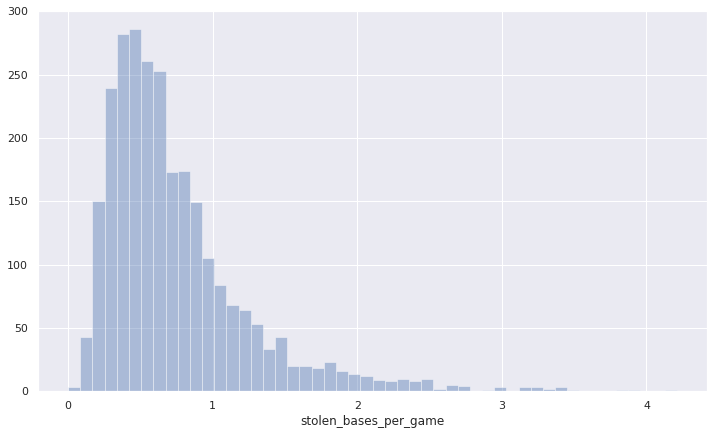

In [0]:
lahman_df = pd.read_csv('/content/gdrive/My Drive/Thinkful/python_for_data_scientists/lahman-teams.csv')
stolen_bases_per_game = []

#stolen bases per game histogram
lahman_df = lahman_df.assign(stolen_bases_per_game = lahman_df.SB / lahman_df.G)

plt.figure(figsize=(12, 7))
stolen_bases = sns.distplot(lahman_df['stolen_bases_per_game'], bins=50, kde=False)

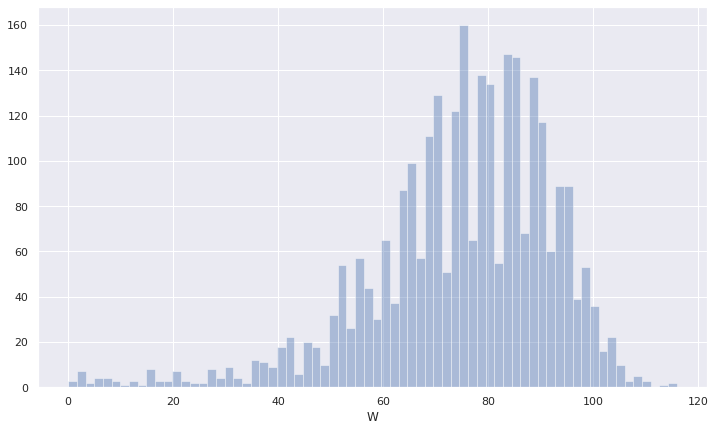

In [0]:
#wins histogram
plt.figure(figsize=(12, 7))
wins_hist = sns.distplot(lahman_df['W'], bins=70, kde=False)

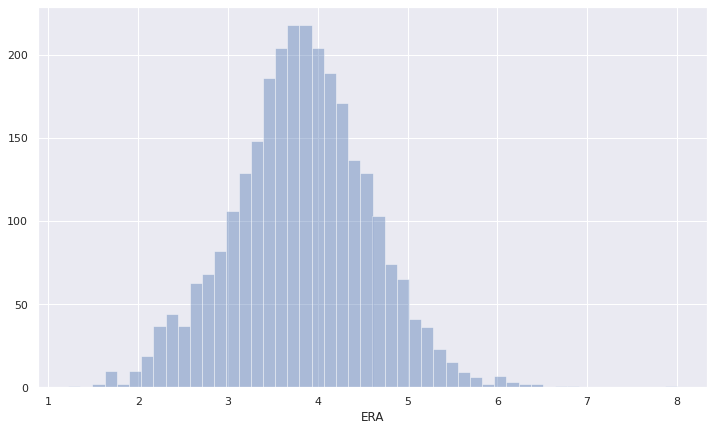

In [0]:
#earned run average histogram
plt.figure(figsize=(12, 7))
wins_hist = sns.distplot(lahman_df['ERA'], bins=50, kde=False)

The distribution of stolen bases per game looks like a gamma distribution, possibly because it is decreasingly likely that higher numbers of bases will be stolen per game.  The distribution of ERA seems to be normal.  The distribution of Wins seems somewhere between normal and binomial, possibly based on the way the baseball season is organized.  It seems there are certain numbers of wins that are more common than others.

b. Conduct some further exploratory data analysis on this dataset. Consider qualities like distributions, correlations and trends over time. Try to find something interesting to say about the data, and use visualizations to support your argument.

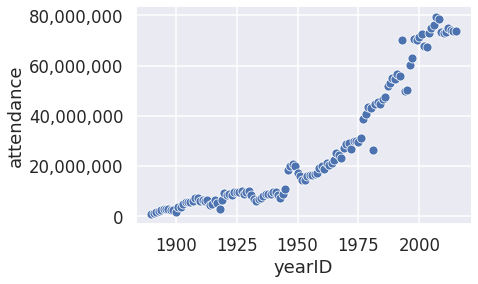

In [0]:
#Is there a statistically significant correlation between attendance at games and percent of wins?
lahman_df = lahman_df.assign(win_percentage = lahman_df.W / lahman_df.G)

wins_bools = lahman_df['win_percentage'].notna()
lahman_v2 = lahman_df.iloc[wins_bools.values]
attendance_bools = lahman_v2['attendance'].notna()
lahman_v3 = lahman_v2.iloc[attendance_bools.values]

#lahman_v3.head()

stats.pearsonr(lahman_v3['win_percentage'], lahman_v3['attendance'])

#There is a significant positive correlation between percent of games won and attendance at games.

#What does total game attendance look like plotted against year?
added = lahman_v3.groupby(['yearID']).sum()
years_vs_attendance = sns.scatterplot(x=added.index, y='attendance', data=added);
sns.despine()
ylabels = ['{:,.0f}'.format(x) for x in years_vs_attendance.get_yticks()];
years_vs_attendance.set_yticklabels(ylabels);

#Over the course of the time period 1890-2015 tracked by the data, total attendance has increased dramatically.

4. Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations each time. Plot the frequencies of the sample means. What distribution does this appear to follow?
Hint: ```df['col'].sample(n=50)``` will draw 50 random observations from ```df['col']```.

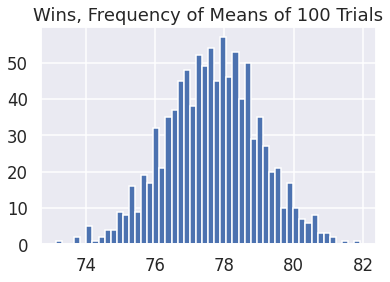

In [0]:
#Frequencies of sample means for Wins
results = []
for trial_num in range(1,1000):
  trials = lahman_v3['W'].sample(n=100)
  means = trials.mean()
  results.append(means)

gamma_plot_df = pd.DataFrame({ 'trials' : results })

gamma_plot_dist = gamma_plot_df.hist(bins=50)
plt.title('Wins, Frequency of Means of 100 Trials');

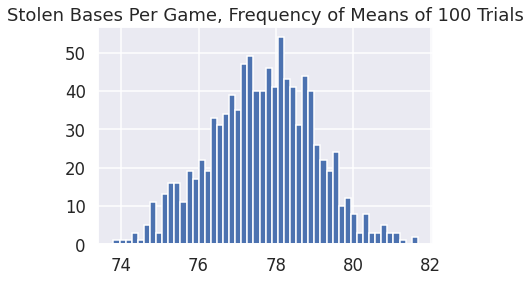

In [0]:
#Frequencies of sample means for Stolen Bases Per Game
results2 = []
for trial_num in range(1,1000):
  trials = lahman_v3['W'].sample(n=100)
  means = trials.mean()
  results2.append(means)

gamma_plot_df = pd.DataFrame({ 'trials' : results2 })

gamma_plot_dist = gamma_plot_df.hist(bins=50)
plt.title('Stolen Bases Per Game, Frequency of Means of 100 Trials');

Both frequency of means plots seem to follow a normal curve, as predicted by the Central Limit Theorem.